In [186]:
import sys

sys.path.append('../')

from fuzzy_system import *

%load_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Create Some Fuzzy Variables


In [241]:
temperature_crisp = CrispSet({("x", make_continuousSet((0, 20)))})
temp = LinguisticVariable(temperature_crisp)

A = Trapezoid("A", 0, 6, 8, 18)


B = Trapezoid("B", 0, 18, 19, 20)
temp.add_linguistic_term(A)
temp.add_linguistic_term(B)

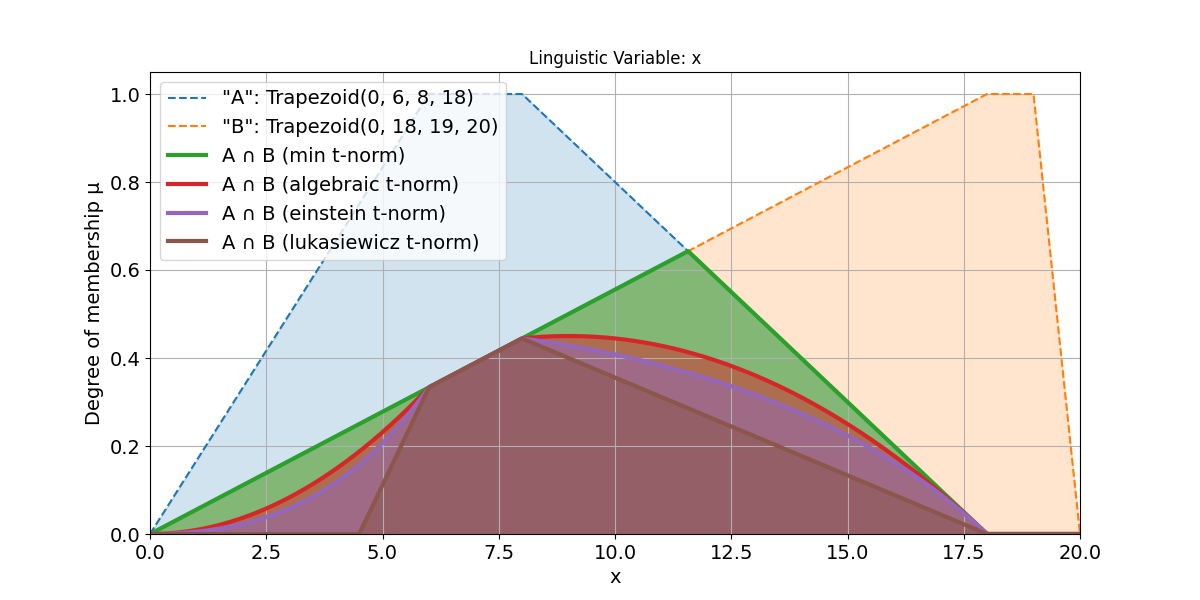

In [260]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 6)

temp.plot(ax, n=1000)

ax.grid(True)


# fill are under the curve
for line in ax.get_lines():
    line_color = line.get_color()
    line.set_linestyle("--")

    ax.fill_between(line.get_xdata(), line.get_ydata(),
                    color=line_color, alpha=0.2)


def min_tnorm(x, y): return min(x, y)
def product_tnorm(x, y): return x * y
def lukasiewicz_tnorm(x, y): return max(0, x + y - 1)
def drastic_tnorm(x, y): return y if x == 1 else x if y == 1 else 0
def einstein_tnorm(x, y): return x * y / (2 - (x + y - x * y))


xs = np.linspace(0, 20, 1000)

ys_min = ("min t-norm", [min_tnorm(A(x), B(x)) for x in xs])
ys_product = ("algebraic t-norm", [product_tnorm(A(x), B(x)) for x in xs])
ys_einstein = ("einstein t-norm", [einstein_tnorm(A(x), B(x)) for x in xs])
ys_lukasiewicz = ("lukasiewicz t-norm",
                  [lukasiewicz_tnorm(A(x), B(x)) for x in xs])


for (name, y) in [ys_min, ys_product, ys_einstein, ys_lukasiewicz]:

    line = ax.plot(xs, y, label=f"A ∩ B ({name})", linewidth=3)
    line_color = line[0].get_color()

    ax.fill_between(xs, y, color=line_color, alpha=0.5)

ax.legend()

ax.set_xlim(0, 20)
ax.set_ylim(0, 1.05)


# text size
ax.tick_params(axis='both', labelsize=14)

#ylabel
ax.set_ylabel("Degree of membership µ", fontsize=14)
#xlabel
ax.set_xlabel("x", fontsize=14)

#legend
ax.legend(fontsize=14)


plt.show()

fig.tight_layout()


fig.savefig("tnorms.png", dpi=300)